### Preprocessing

In [396]:
import numpy as np
import pandas as pd

In [397]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [398]:
np.random.seed(1)

In [399]:
X = np.random.normal(size=(20,2))
X

array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ],
       [ 0.3190391 , -0.24937038],
       [ 1.46210794, -2.06014071],
       [-0.3224172 , -0.38405435],
       [ 1.13376944, -1.09989127],
       [-0.17242821, -0.87785842],
       [ 0.04221375,  0.58281521],
       [-1.10061918,  1.14472371],
       [ 0.90159072,  0.50249434],
       [ 0.90085595, -0.68372786],
       [-0.12289023, -0.93576943],
       [-0.26788808,  0.53035547],
       [-0.69166075, -0.39675353],
       [-0.6871727 , -0.84520564],
       [-0.67124613, -0.0126646 ],
       [-1.11731035,  0.2344157 ],
       [ 1.65980218,  0.74204416]])

In [400]:
y_1 = np.array([1]*10)
y_minus1 = np.array([-1]*10)
y = np.concatenate([y_1, y_minus1])
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

In [401]:
X[y==1] += 1
X

array([[ 2.62434536,  0.38824359],
       [ 0.47182825, -0.07296862],
       [ 1.86540763, -1.3015387 ],
       [ 2.74481176,  0.2387931 ],
       [ 1.3190391 ,  0.75062962],
       [ 2.46210794, -1.06014071],
       [ 0.6775828 ,  0.61594565],
       [ 2.13376944, -0.09989127],
       [ 0.82757179,  0.12214158],
       [ 1.04221375,  1.58281521],
       [-1.10061918,  1.14472371],
       [ 0.90159072,  0.50249434],
       [ 0.90085595, -0.68372786],
       [-0.12289023, -0.93576943],
       [-0.26788808,  0.53035547],
       [-0.69166075, -0.39675353],
       [-0.6871727 , -0.84520564],
       [-0.67124613, -0.0126646 ],
       [-1.11731035,  0.2344157 ],
       [ 1.65980218,  0.74204416]])

Text(0,0.5,'X[:, 1]')

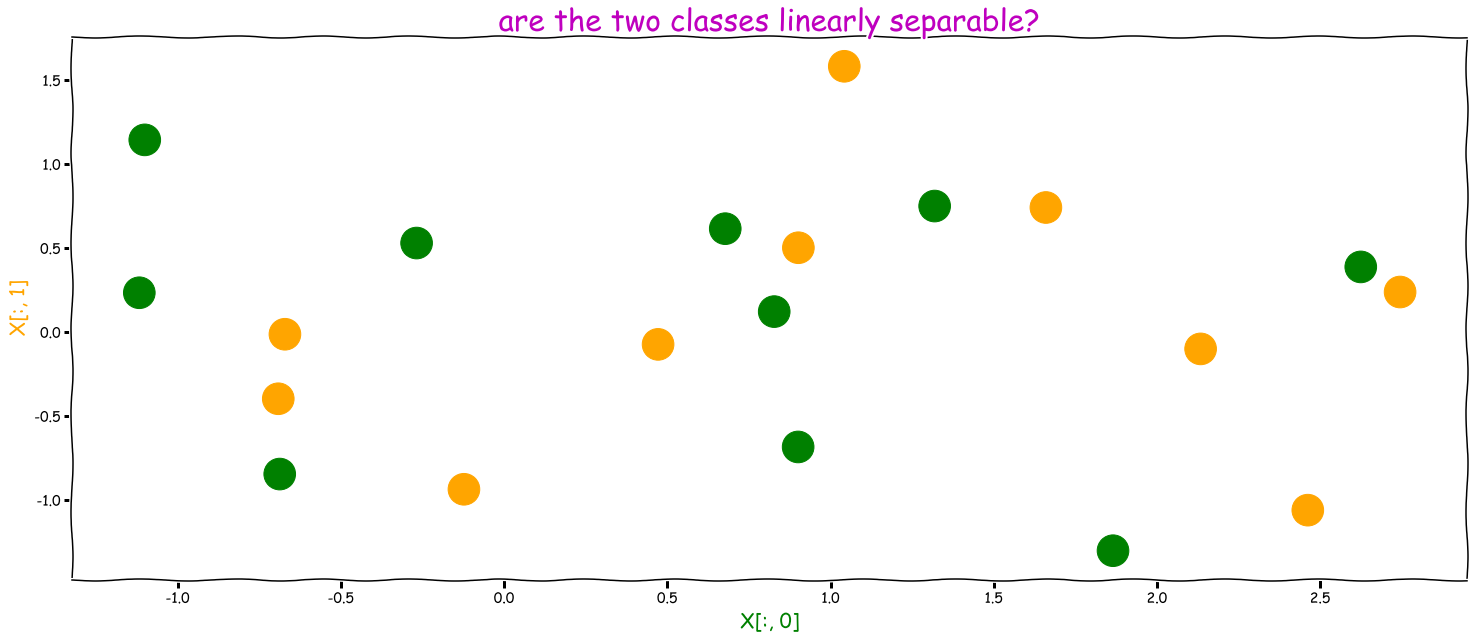

In [402]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(X[:,0][:],X[:,1][:], marker='o', s=1000, c=['green', 'orange'])
plt.title('are the two classes linearly separable?', color='m', fontsize=30)
plt.xlabel('X[:, 0]', color='green', fontsize=20)
plt.ylabel('X[:, 1]', color='orange', fontsize=20)

**Therefore, the two classes are not linearly separable.**

**Support vector classifier**

In [403]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
svmfit10 = SVC(kernel='linear', C=10).fit(X, y)

Text(0,0.5,'X[:, 1]')

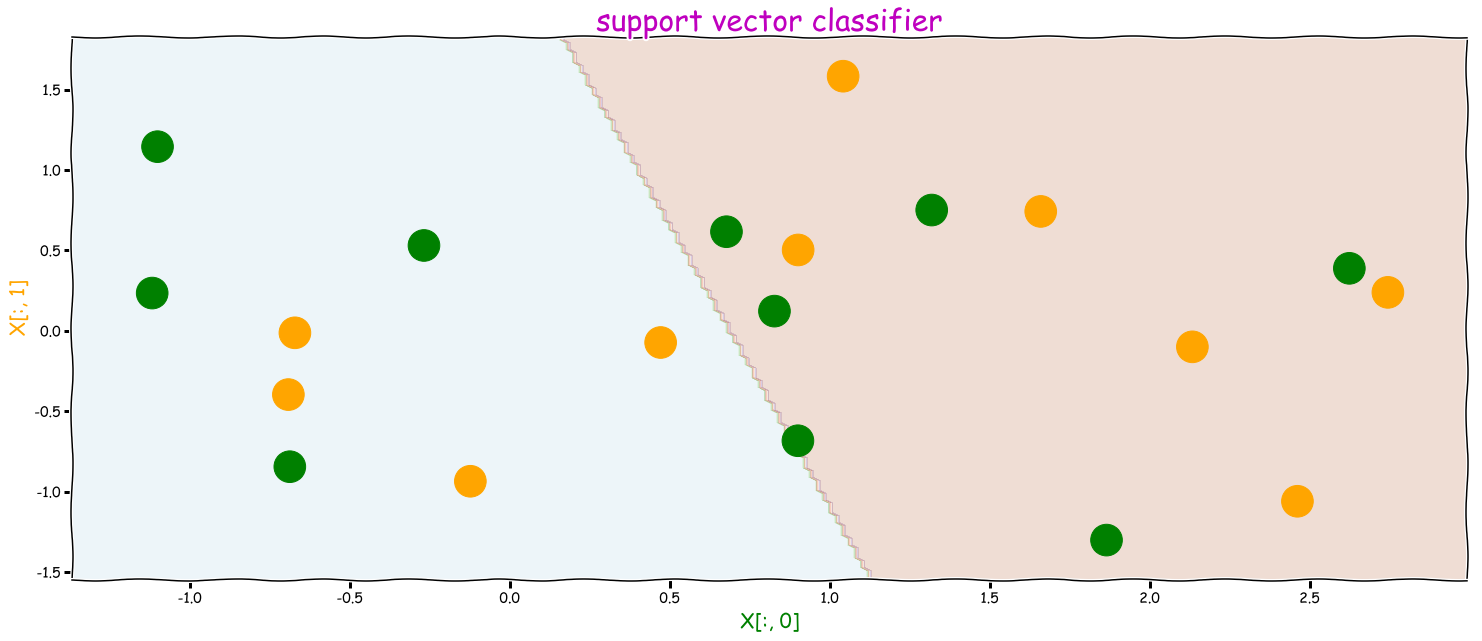

In [404]:
def svmplot(svc, X, y, height=0.02, buffer=0.25):
    x_min, x_max = X[:, 0].min()-buffer, X[:, 0].max()+buffer
    y_min, y_max = X[:, 1].min()-buffer, X[:, 1].max()+buffer
    xx, yy = np.meshgrid(np.arange(x_min, x_max, height), np.arange(y_min, y_max, height))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    
plt.xkcd()
plt.figure(figsize=(25, 10))
svmplot(svmfit10, X, y)
plt.scatter(X[:,0][:],X[:,1][:], marker='o', s=1000, c=['green', 'orange'])
plt.title('support vector classifier', color='m', fontsize=30)
plt.xlabel('X[:, 0]', color='green', fontsize=20)
plt.ylabel('X[:, 1]', color='orange', fontsize=20)

In [405]:
svmfit10.support_ # these are the support vectors

array([11, 12, 14, 19,  1,  2,  6,  8,  9], dtype=int32)

In [406]:
conf_mat10 = pd.DataFrame(confusion_matrix(y, svmfit10.predict(X)).T, index = svmfit.classes_, columns = svmfit.classes_)
conf_mat10

,-1,1
-1,7,1
1,3,9


In [407]:
class_mat10 = classification_report(y, svmfit10.predict(X))
print(class_mat10)

              precision    recall  f1-score   support

          -1       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

   micro avg       0.80      0.80      0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20



Text(0,0.5,'X[:, 1]')

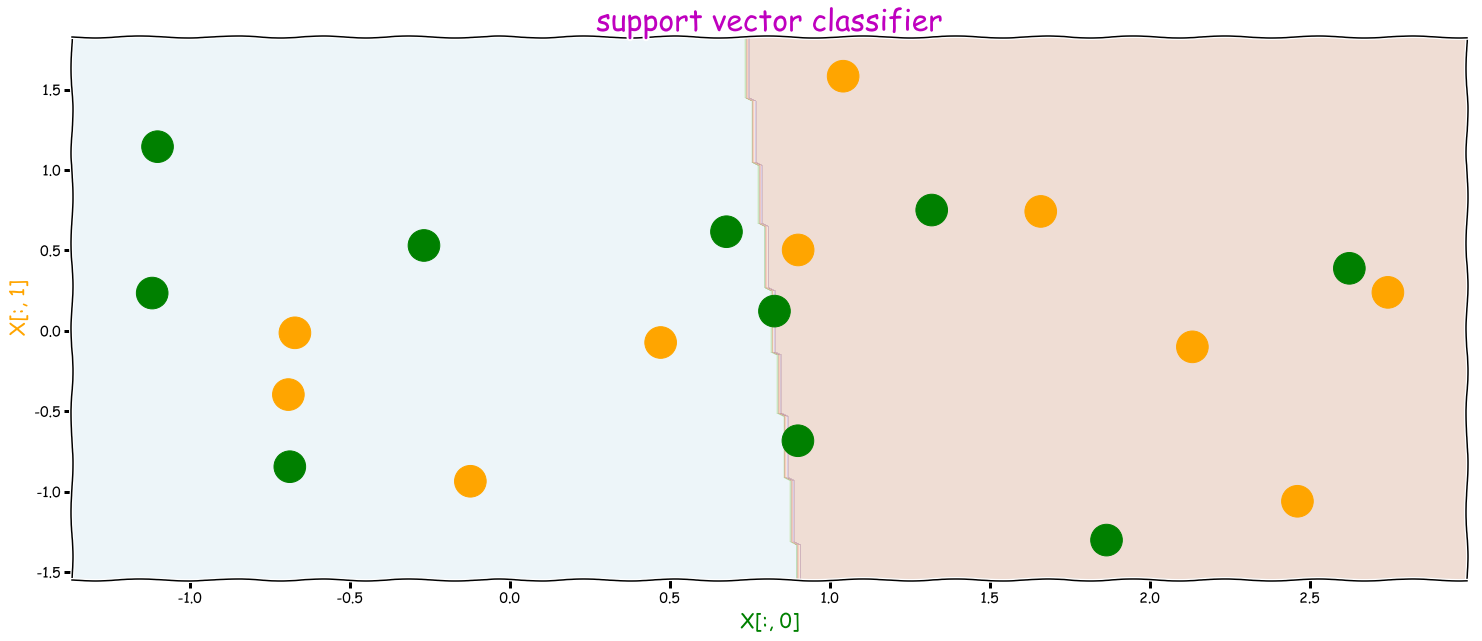

In [408]:
svmfit001 = SVC(kernel='linear', C=0.001).fit(X, y) # using smaller value of cost vector

plt.figure(figsize=(25, 10))
svmplot(svmfit001, X, y)
plt.scatter(X[:,0][:],X[:,1][:], marker='o', s=1000, c=['green', 'orange'])
plt.title('support vector classifier', color='m', fontsize=30)
plt.xlabel('X[:, 0]', color='green', fontsize=20)
plt.ylabel('X[:, 1]', color='orange', fontsize=20)

In [409]:
svmfit001.support_ # these are the support vectors

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  0,  1,  2,  3,  4,  5,  6,
        7,  8,  9], dtype=int32)

*If we use smaller cost vector, there are a larger number of support vectors used because the margin is now wider.*

In [410]:
conf_mat001 = pd.DataFrame(confusion_matrix(y, svmfit001.predict(X)).T, index = svmfit.classes_, columns = svmfit.classes_)
conf_mat001

,-1,1
-1,7,2
1,3,8


In [411]:
class_mat001 = classification_report(y, svmfit001.predict(X))
print(class_mat001)

              precision    recall  f1-score   support

          -1       0.78      0.70      0.74        10
           1       0.73      0.80      0.76        10

   micro avg       0.75      0.75      0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



In [412]:
from sklearn.model_selection import GridSearchCV as GSV

In [414]:
cost_range = [{'C': np.linspace(0.001, 20, 1000)}]
cost_cv= GSV(SVC(kernel='linear'), cost_range, cv=10, scoring='accuracy', return_train_score=True).fit(X, y)

In [415]:
best_params = cost_cv.best_params_
best_params['C']

0.16115215215215214

**GridSearchCV suggests that the best results are obtained at C=0.16115215215215214.**

In [424]:
X_test = np.random.normal(size=(20,2))
X_test

array([[-2.23877138,  1.75539696],
       [-0.26419336,  0.84629447],
       [ 2.0867325 ,  0.52647831],
       [ 0.983809  , -1.92220001],
       [-0.89482523,  0.33006282],
       [ 1.048591  ,  1.34989935],
       [ 1.24567511, -0.69119147],
       [ 1.28107338, -0.72706431],
       [-0.79916869, -0.00354562],
       [ 0.51259464, -0.16786086],
       [ 1.34633628, -0.61549198],
       [-0.7430367 ,  1.01593613],
       [-0.55515541,  0.43625936],
       [-0.14668972,  0.02349282],
       [-0.25830219,  1.83915619],
       [-0.19398959,  1.57413147],
       [ 0.75690047, -0.52712427],
       [-0.75342948,  0.08994664],
       [ 1.68171225, -0.19067451],
       [-0.1590844 , -1.373131  ]])

In [425]:
y_1_test = np.array([1]*10)
y_minus1_test = np.array([-1]*10)
y_test = np.concatenate([y_1_test, y_minus1_test])
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

In [426]:
X_test[y_test==1] += 1
X_test

array([[-1.23877138,  2.75539696],
       [ 0.73580664,  1.84629447],
       [ 3.0867325 ,  1.52647831],
       [ 1.983809  , -0.92220001],
       [ 0.10517477,  1.33006282],
       [ 2.048591  ,  2.34989935],
       [ 2.24567511,  0.30880853],
       [ 2.28107338,  0.27293569],
       [ 0.20083131,  0.99645438],
       [ 1.51259464,  0.83213914],
       [ 1.34633628, -0.61549198],
       [-0.7430367 ,  1.01593613],
       [-0.55515541,  0.43625936],
       [-0.14668972,  0.02349282],
       [-0.25830219,  1.83915619],
       [-0.19398959,  1.57413147],
       [ 0.75690047, -0.52712427],
       [-0.75342948,  0.08994664],
       [ 1.68171225, -0.19067451],
       [-0.1590844 , -1.373131  ]])

Text(0,0.5,'X[:, 1]')

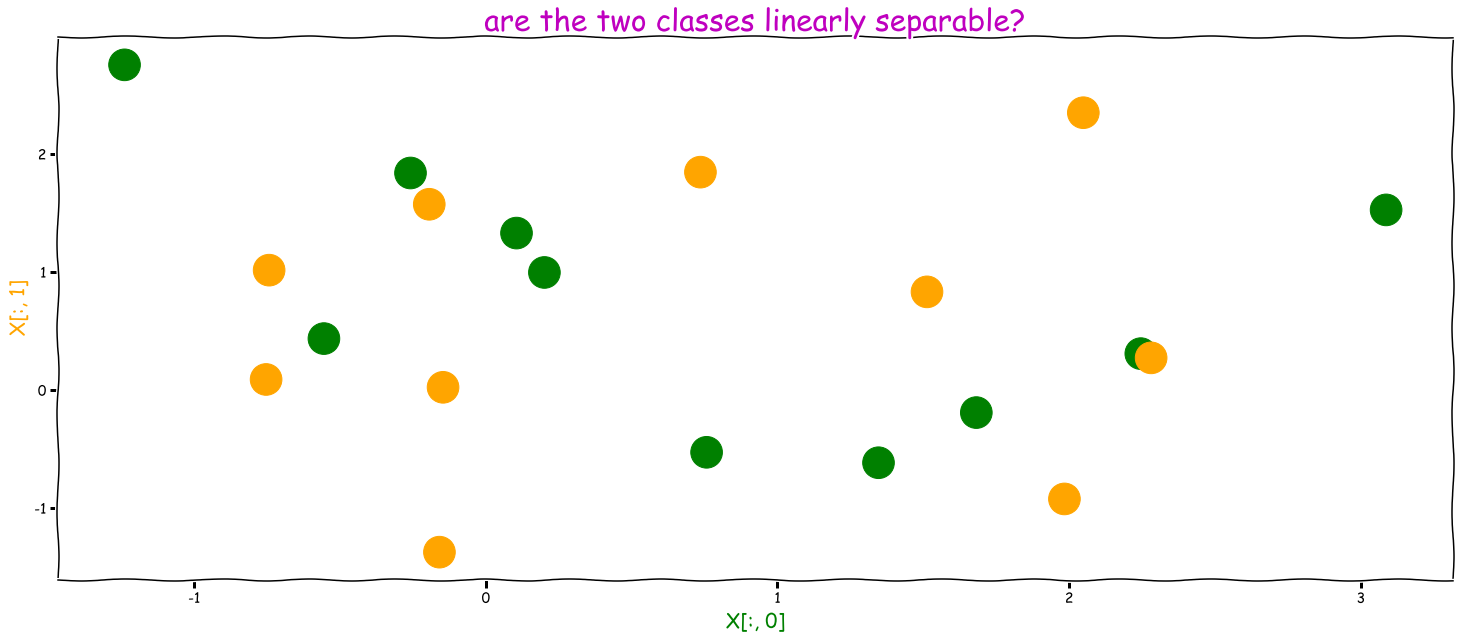

In [427]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(X_test[:,0][:],X_test[:,1][:], marker='o', s=1000, c=['green', 'orange'])
plt.title('are the two classes linearly separable?', color='m', fontsize=30)
plt.xlabel('X[:, 0]', color='green', fontsize=20)
plt.ylabel('X[:, 1]', color='orange', fontsize=20)

Text(0,0.5,'X_test[:, 1]')

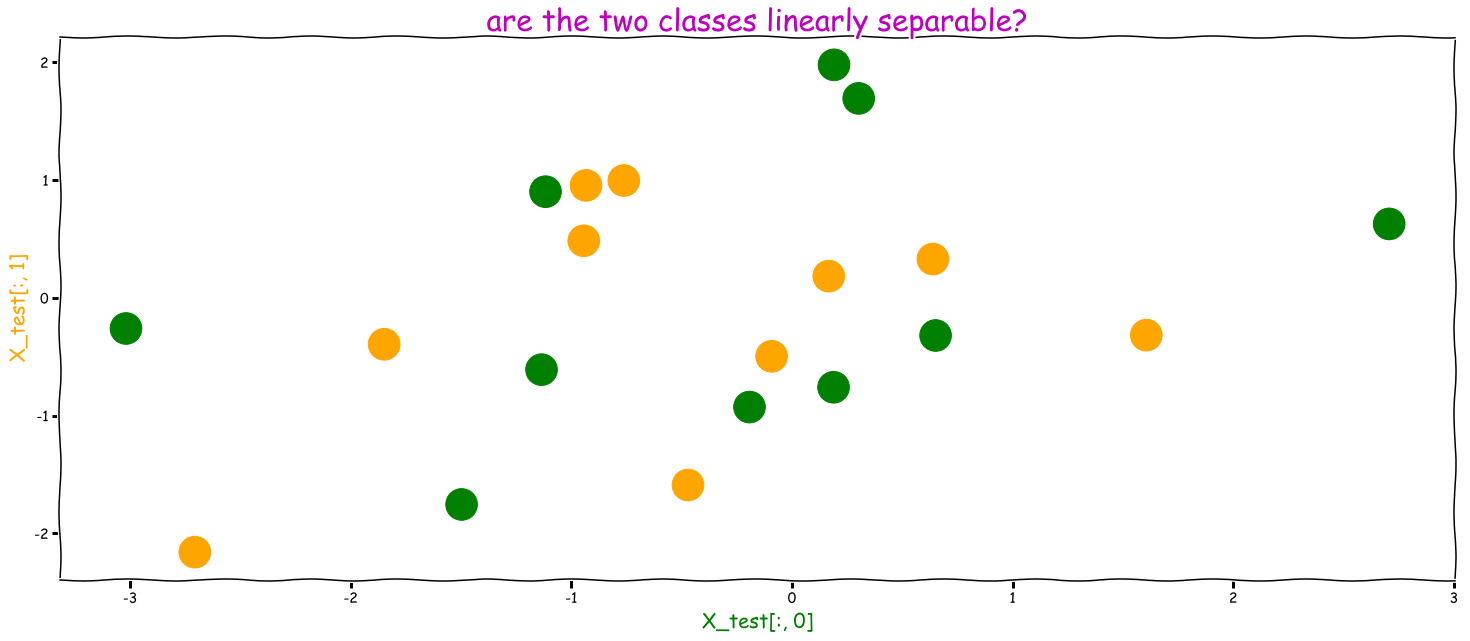

In [428]:
np.random.seed(101)
X_test = np.random.normal(size=(20,2))
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1]-1

plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(X_test[:,0][:],X_test[:,1][:], marker='o', s=1000, c=['green', 'orange'])
plt.title('are the two classes linearly separable?', color='m', fontsize=30)
plt.xlabel('X_test[:, 0]', color='green', fontsize=20)
plt.ylabel('X_test[:, 1]', color='orange', fontsize=20)

Text(0,0.5,'X_test[:, 1]')

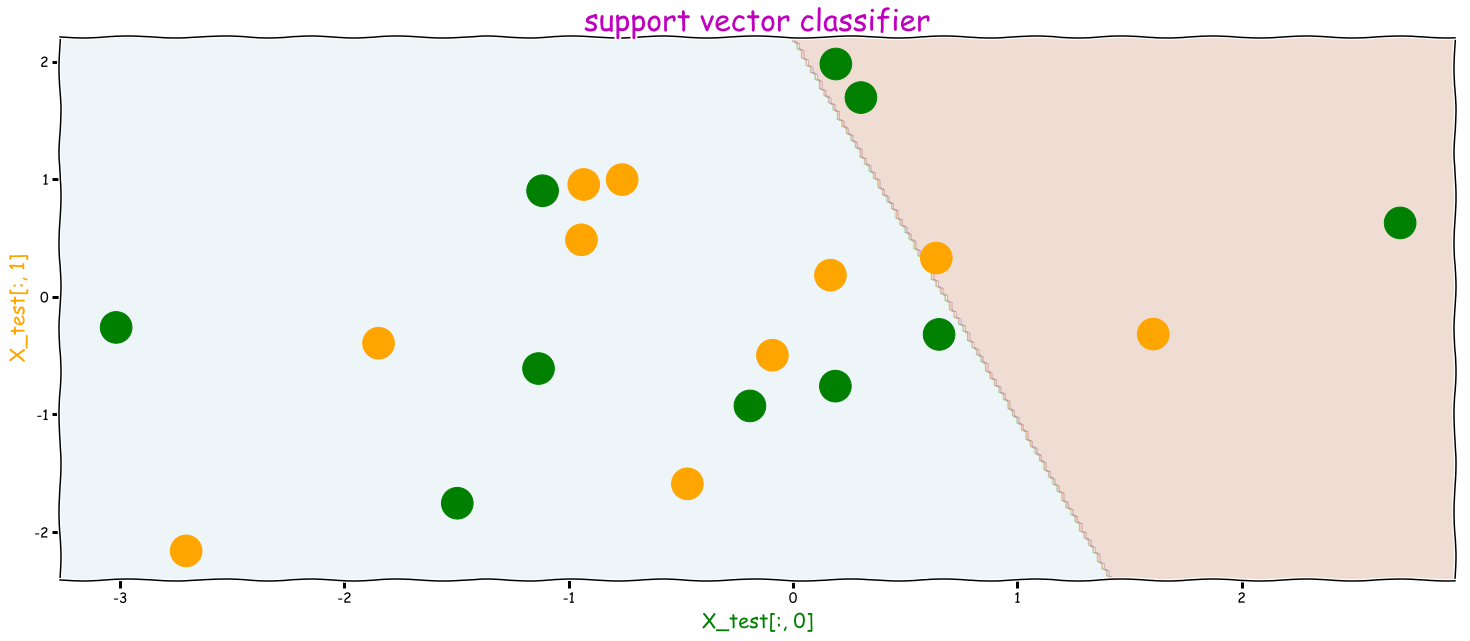

In [429]:
svmfit_test = SVC(C=best_params['C'], kernel='linear').fit(X, y)

plt.figure(figsize=(25, 10))
svmplot(svmfit_test, X_test, y_test)
plt.scatter(X_test[:,0][:],X_test[:,1][:], marker='o', s=1000, c=['green', 'orange'])
plt.title('support vector classifier', color='m', fontsize=30)
plt.xlabel('X_test[:, 0]', color='green', fontsize=20)
plt.ylabel('X_test[:, 1]', color='orange', fontsize=20)

In [430]:
conf_mat_test = pd.DataFrame(confusion_matrix(y_test, svmfit.predict(X_test)), index=svmfit_test.classes_, columns=svmfit_test.classes_)
conf_mat_test

,-1,1
-1,8,1
1,10,1


In [431]:
class_mat = classification_report(y_test, svmfit.predict(X_test))
print(class_mat)

              precision    recall  f1-score   support

          -1       0.44      0.89      0.59         9
           1       0.50      0.09      0.15        11

   micro avg       0.45      0.45      0.45        20
   macro avg       0.47      0.49      0.37        20
weighted avg       0.47      0.45      0.35        20



Text(0,0.5,'X_test[:, 1]')

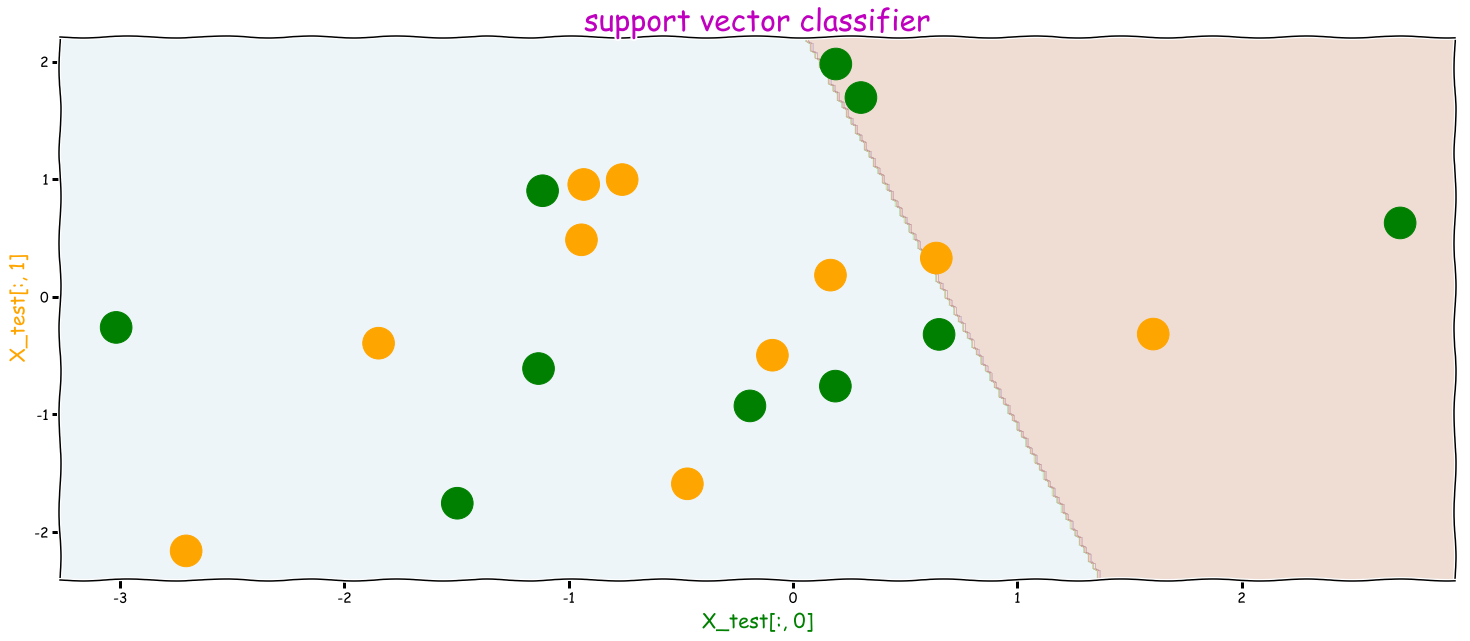

In [435]:
svmfit_test001 = SVC(C=10, kernel='linear')
svmfit_test001.fit(X, y)

plt.figure(figsize=(25, 10))
svmplot(svmfit_test, X_test, y_test)
plt.scatter(X_test[:,0][:],X_test[:,1][:], marker='o', s=1000, c=['green', 'orange'])
plt.title('support vector classifier', color='m', fontsize=30)
plt.xlabel('X_test[:, 0]', color='green', fontsize=20)
plt.ylabel('X_test[:, 1]', color='orange', fontsize=20)

In [437]:
conf_mat_test = pd.DataFrame(confusion_matrix(y_test, svmfit_test001.predict(X_test)), index=svmfit_test001.classes_, columns=svmfit_test001.classes_)
conf_mat_test

,-1,1
-1,5,4
1,10,1


In [438]:
class_mat_test001 = classification_report(y_test, svmfit_test.predict(X_test))
print(class_mat_test)

              precision    recall  f1-score   support

          -1       0.25      0.50      0.33         8
           1       0.00      0.00      0.00        12

   micro avg       0.20      0.20      0.20        20
   macro avg       0.12      0.25      0.17        20
weighted avg       0.10      0.20      0.13        20



**Therefore, we see that C=10 provides worse results that C=0.16115215215215214. Using other values of C provide the same result.**